### Wstęp do Uczenia Maszynowego 
##### Laboratorium 5

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### Zadanie 2
-----
Eksperyment symulacyjny. Wygenerujmy dane w następujący sposób. Niech $n = 200$, $p = 5$. Wektor $\beta_0 = 1$, $\beta_1 = [2, 1, 0.5, 0.01, 0]$, $x_i \sim N_p(0, I)$ dla $i = 1,2, \dots, n$. $y_i$ pochodzi z rozkładu $Bern(p_i)$, gdzie $p_i=\frac{exp(\beta_0 + x_{i\cdot}\beta_1)}{1 + exp(\beta_0 + x_{i\cdot}\beta_1)}$.

a) Dopasuj model regresji logistycznej. Porównaj prawdziwe wartości wektora $\beta$ z wyestymowanymi.

b) Dopasuj model regresji logistycznej z regularyzacją $L2$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

c) Dopasuj model regresji logistycznej z regularyzacją $L1$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

d) Powtórz eksperyment 500 razy dla modelu logistycznego bez regularyzacji, z regularyzacją $L2$ i parametrem $C=1$ i regularyzacją $L1$ i parametrem $C=1$. Oblicz MSE.

In [2]:
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])
X = np.random.normal(0, 1, size = (n, p))
Xbeta = X@beta_1+beta_0
probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
y = np.random.binomial(1, probs) 

In [3]:
# a)
lm = LogisticRegression(penalty = None)
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)

[[ 2.43798035  1.02490577  0.58229129  0.19543791 -0.18275788]]
[1.3831635]


In [4]:
# b)
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    lm = LogisticRegression(penalty = 'l2', C = c)
    lm.fit(X, y)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

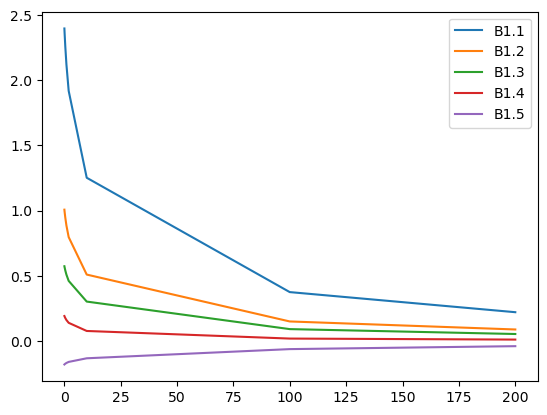

In [5]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()

In [ ]:
# c)
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    lm = LogisticRegression(penalty = 'l1', solver='liblinear', C = c)
    lm.fit(X, y)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

In [ ]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()

In [ ]:
#d) 

##### Laboratorium 6

<img src="svm_1.png"  width="1000"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

In [10]:
# Losowanie dwóch zmiennych z rozkładu standardowego normalnego.
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25 + [1]*25)
# Przesunięcie punktów o wektor [2, 2].
X[y == 1] += 2

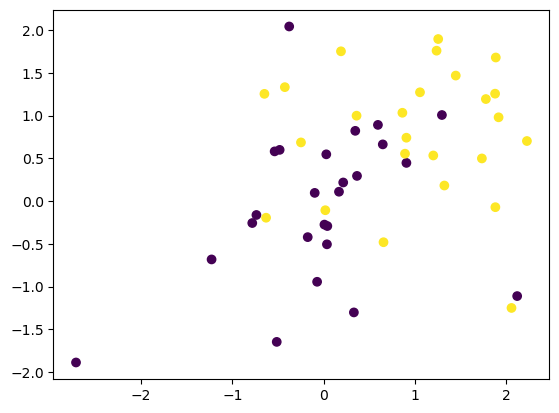

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)

### Zadanie 1
-----
Zbuduj model wektorów podpierających wykorzystując zdefinowane X i y jak zbiór treningowy. Ustaw parametr `C` = 10, `kernel` = 'linear'.

<img src="svm_2.png"  width="700"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

### Wyznaczanie hiperpłaszczyzny (dla dwóch wymiarów)

$<w, x> + b = 0$

$w_1x_1 + w_2x_2 + b = 0$

$w_2x_2 = -w_1x_1 - b$

$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$



In [ ]:
W = ?
b = ?

A = -W[0]/W[1]
B = -b/W[1]

### Zadanie 2
-----
Wyznacz, które punkty są wektorami podpierającymi i zaznacz je na powyższym wykresie.

### Zadanie 3
-----
Zbuduj model wektorów podpierających wykorzystując zdefinowane X i y jak zbiór treningowy. Ustaw parametr `C` = 0.01, `kernel` = 'linear'. Narysuj płaszczyznę rozdzielającą klasy i wskaż wektory podpierające. 

### Wyznaczanie marginesu (dla dwóch wymiarów)

$margin_{magnitude} = \frac{1}{||w||}$

$||w|| = \sqrt{w_1^2 + w_2^2}$

$\hat{w} = \frac{w}{||w||}$


In [37]:
w_hat = ?

In [38]:
margin = ?

In [39]:
decision_boundary_points = np.array(list(zip(np.array([-3,3]), A * np.array([-3,3]) + B)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

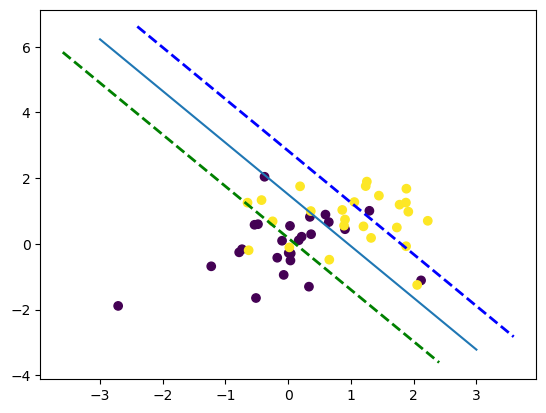

In [41]:



# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

### Optymalizacja parametru C

In [42]:
import sklearn.model_selection as skm
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)

In [43]:
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}, 
                         refit=True,
                         cv=kfold,
                         scoring='accuracy')

In [44]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=10, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

Sprawdzenie modelu na zbiorze testowym

In [ ]:
rng = np.random.default_rng(1)
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test == 1] += 2


<img src="svm_3.png"  width="700"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

### Podsumowanie, czyli co warto wiedzieć...


1. Idea regresji liniowej
2. Regresja logistyczna

    a) przekształcenie funkcją sigmoid

    b) wyliczanie współczynników metodą ML

    c) regularyzacja L1 + własności (ograniczenie liczby zmiennych)

    d) regularyzacja L2

    e) przypadek danych liniowo separowalnych

3. SVM (liniowe)

    a) wyznaczanie hiperpłaszczyzny, marginesu, wektorów podpierających

    b) przypadek danych nieseparowalnych - kara C (analogia do L2)
    
4. Funkcje straty